In [1]:
################################
# Scientific imports
################################
import gc
import matplotlib.pyplot as plt
import numpy as np
import fnmatch

################################
# General imports
################################
import csv, math, io, os, os.path, sys, random, time, json
import pandas as pd
import seaborn as sb
from tqdm.notebook import tqdm, trange

################################
# SciKitLearn Imports
################################
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

from IPython.display import display

################################
# MatPlotLib Settings
################################
plt.rcParams["figure.figsize"] = (5,5)
sb.set()

In [31]:
################################
# Functions
################################
def MakeMatrix(TN, FP, FN, TP):
    Matrix = [[0 for x in range(2)] for y in range(2)]
    Matrix[0][0] = TN
    Matrix[0][1] = FP
    Matrix[1][0] = FN
    Matrix[1][1] = TP
    return(Matrix)

def PlotConfusionMatrix(mat, title):
    
    confMat = sb.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap="rocket",
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'],
            annot_kws={"size": 20})
    
    confMat.set_xticklabels(confMat.get_xmajorticklabels(), fontsize = 14)
    confMat.set_yticklabels(confMat.get_ymajorticklabels(), fontsize = 14)
    
    plt.rcParams["figure.figsize"] = (5,5)
    sb.set(font_scale=1.3)
    
    fig = confMat.get_figure() 
    plt.xlabel('Actual Value', fontsize=16, labelpad=10)
    plt.ylabel('Predicted Value', fontsize=16, labelpad=10)
    
    titleText = "Confusion Matrix: "+title
    
    plt.title(titleText)
    
    #plt.show()
    
    targetdest="./confusionmatrices/"
    #plt.savefig(targetdest+"PCA_SVM_Matrix.png")
    plt.savefig("{}ConfusionMatrix_{}.png".format(targetdest,title))

In [9]:
jsonlist = []
files = os.listdir('./NEW_RESULTS/')
for file in files:
    if file.endswith(".json"):
        jsonlist.append(file)
jsonlist

['sklearn-KNN.json',
 'sklearn-NB-gauss.json',
 'sklearn-RNDTREE.json',
 'sklearn-SVM.json']

In [29]:
keylist = []

for jsonfile in jsonlist: 
    with open("./NEW_RESULTS/"+jsonfile, "r") as f:
        data = json.load(f)[jsonfile.split(".json")[0]]
        acc = data[0]['Accuracy']
        pre = data[0]['Precision']
        rec = data[0]['Recall']
        
        keylist.append({jsonfile: 
                                {
                                    'acc': acc,
                                    'pre': pre,
                                    'rec': rec
                                }})

In [36]:
keylist, keylist[0]

([{'sklearn-KNN.json': {'acc': 0.7321428571428571,
    'pre': 0.27845884413309985,
    'rec': 0.554006968641115}},
  {'sklearn-NB-gauss.json': {'acc': 0.21577380952380953,
    'pre': 0.14989177489177488,
    'rec': 0.9651567944250871}},
  {'sklearn-RNDTREE.json': {'acc': 0.8844246031746031,
    'pre': 0.875,
    'rec': 0.21951219512195122}},
  {'sklearn-SVM.json': {'acc': 0.8576388888888888, 'pre': 0.0, 'rec': 0.0}}],
 {'sklearn-KNN.json': {'acc': 0.7321428571428571,
   'pre': 0.27845884413309985,
   'rec': 0.554006968641115}})

In [164]:
vallist=[]
for i in range(len(keylist)):
    q = keylist[i].values()
    #print(q)
    for j in q:
        #print(j)
        vallist.append(j)
vallist

[{'acc': 0.7321428571428571,
  'pre': 0.27845884413309985,
  'rec': 0.554006968641115},
 {'acc': 0.21577380952380953,
  'pre': 0.14989177489177488,
  'rec': 0.9651567944250871},
 {'acc': 0.8844246031746031, 'pre': 0.875, 'rec': 0.21951219512195122},
 {'acc': 0.8576388888888888, 'pre': 0.0, 'rec': 0.0}]

In [138]:
[[keys.keys() for keys in jsonfile.values()] for jsonfile in keylist][0][0]

dict_keys(['acc', 'pre', 'rec'])

In [150]:
algolist=['K-Nearest\nNeighbour', 'Gaussian\nNaive\nBayes', 'Random\nDecision\nTree', 'Support\nVector\nMachine', 'Always\nPredicts\nPositive', 'Always\nPredicts\nNegative', 'Random']

masterX = np.load("True_NOO_fluxes.npy")
masterY = np.load("True_NOO_isplanetlist.npy")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(masterX, masterY, random_state=42)

y_pred = np.array([round(random.uniform(0, 1)) for x in y_test])
yes_y_pred = np.array([1 for x in y_pred])
no_y_pred = np.array([0 for x in y_pred])
    
rnd_acc = accuracy_score(y_test, y_pred)
rnd_pre = precision_score(y_test, y_pred)
rnd_rec = recall_score(y_test, y_pred)

print(f"{rnd_acc}\n{rnd_pre}\n{rnd_rec}")

0.503968253968254
0.1466798810703667
0.5156794425087108


In [170]:
pred_yes = {'acc': accuracy_score(y_test, yes_y_pred), 'pre': precision_score(y_test, yes_y_pred), 'rec': recall_score(y_test, yes_y_pred)}
pred_no =  {'acc': accuracy_score(y_test, no_y_pred), 'pre': precision_score(y_test, no_y_pred), 'rec': recall_score(y_test, no_y_pred)}
pred_rnd = {'acc': 0.5044642857142857, 'pre': 0.1482213438735178, 'rec': 0.5226480836236934}

pred_yes, pred_no, pred_rnd

/home/jdowzell/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'acc': 0.1423611111111111, 'pre': 0.1423611111111111, 'rec': 1.0},
 {'acc': 0.8576388888888888, 'pre': 0.0, 'rec': 0.0},
 {'acc': 0.5044642857142857,
  'pre': 0.1482213438735178,
  'rec': 0.5226480836236934})

In [171]:
full_vallist = vallist.extend([pred_yes, pred_no, pred_rnd])

In [172]:
vallist

[{'acc': 0.7321428571428571,
  'pre': 0.27845884413309985,
  'rec': 0.554006968641115},
 {'acc': 0.21577380952380953,
  'pre': 0.14989177489177488,
  'rec': 0.9651567944250871},
 {'acc': 0.8844246031746031, 'pre': 0.875, 'rec': 0.21951219512195122},
 {'acc': 0.8576388888888888, 'pre': 0.0, 'rec': 0.0},
 {'acc': 0.1423611111111111, 'pre': 0.1423611111111111, 'rec': 1.0},
 {'acc': 0.8576388888888888, 'pre': 0.0, 'rec': 0.0},
 {'acc': 0.5044642857142857,
  'pre': 0.1482213438735178,
  'rec': 0.5226480836236934}]

In [175]:
jsonlist
full_jsonlist = jsonlist.extend(['Always Yes', 'Always No', 'Random'])
jsonlist

['sklearn-KNN.json',
 'sklearn-NB-gauss.json',
 'sklearn-RNDTREE.json',
 'sklearn-SVM.json',
 'Always Yes',
 'Always No',
 'Random']

In [181]:
algoList = ['K-Nearest\nNeighbour', 'Gaussian\nNaive\nBayes', 'Random\nDecision\nTree', 'Support\nVector\nMachine', 'Always\nPredicts\nPositive', 'Always\nPredicts\nNegative', 'Random']

In [201]:
df = pd.DataFrame(vallist, index=algolist, columns=[[keys.keys() for keys in jsonfile.values()] for jsonfile in keylist][0][0])
df = df.rename(columns={"acc": "Accuracy", "pre": "Precision", "rec": "Recall"})
df

,Accuracy,Precision,Recall
K-Nearest\nNeighbour,0.732143,0.278459,0.554007
Gaussian\nNaive\nBayes,0.215774,0.149892,0.965157
Random\nDecision\nTree,0.884425,0.875000,0.219512
Support\nVector\nMachine,0.857639,0.000000,0.000000
Always\nPredicts\nPositive,0.142361,0.142361,1.000000
Always\nPredicts\nNegative,0.857639,0.000000,0.000000
Random,0.504464,0.148221,0.522648


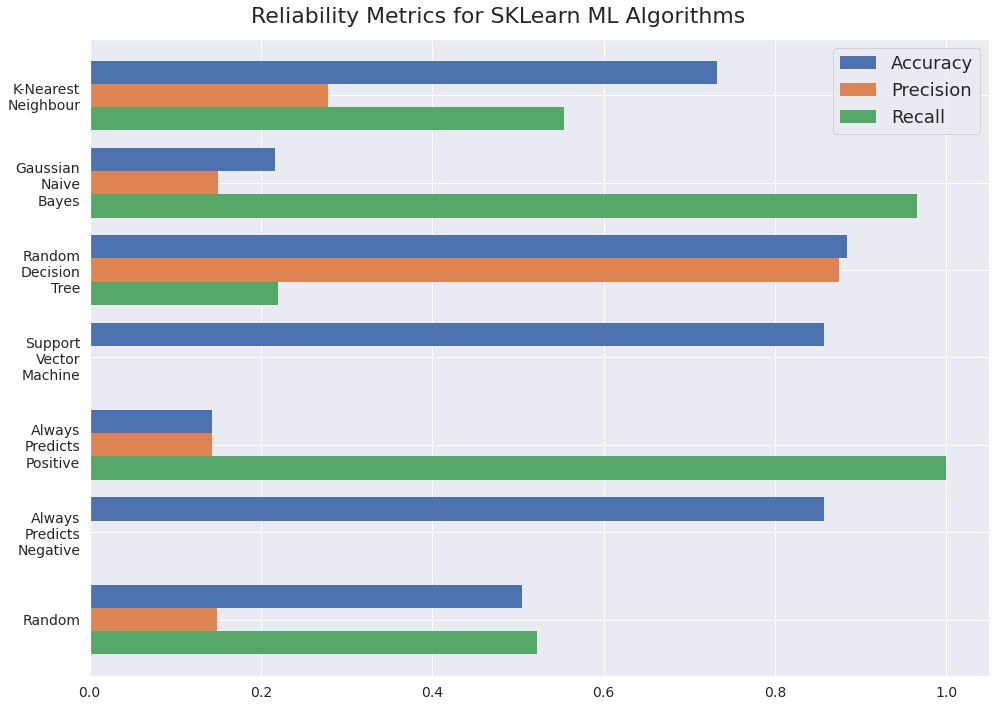

In [202]:
plt.rcParams["figure.figsize"] = (14,10)

#df.reset_index(inplace=True)
fig = df.plot.barh(rot=0, ylim=[0,1], fontsize=14, width = 0.8, linewidth=0)
plt.gcf().suptitle("Reliability Metrics for SKLearn ML Algorithms",fontsize=22)
plt.gca().invert_yaxis()
fig.legend(loc=0, prop={'size': 18})
plt.tight_layout()
fig.figure.savefig("./img/SKLearn_Metrics_BETTER.png")

plt.rcParams["figure.figsize"] = (10,6)

In [2]:
import numpy as np

masterX = np.load("True_NOO_fluxes.npy")


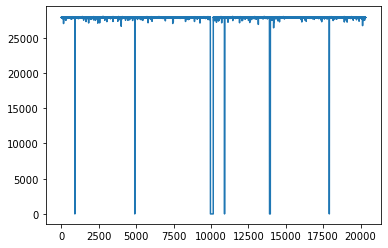

In [3]:
import matplotlib.pyplot as plt

plt.plot(masterX[0])

In [6]:
from sklearn.preprocessing import FunctionTransformer
from sktime.datatypes._panel._convert import from_2d_array_to_nested, from_nested_to_2d_array, is_nested_dataframe

def MakeNested(masterX):

    X_nested = from_2d_array_to_nested(np.array(masterX))
    
    return X_nested

mnst = FunctionTransformer(MakeNested)

In [10]:
X_arr = mnst.transform(masterX)

In [25]:
testX = from_nested_to_2d_array(X_arr, True)

In [26]:
masterX[0], testX[0]

(array([27859.346, 27856.885, 27849.662, ..., 27851.479, 27877.145,
        27894.836], dtype=float32),
 array([27859.346, 27856.885, 27849.662, ..., 27851.479, 27877.145,
        27894.836], dtype=float32))

In [27]:
Y_arr = np.load("True_NOO_isplanetlist.npy")

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, random_state=42)

In [29]:
X_train

,0
2842,0 29198.369141 1 29205.552734 2 ...
1049,0 8752.197266 1 8787.105469 2 ...
626,0 156541.890625 1 156601.859375 ...
1775,0 625859.3750 1 625644.1875 2 ...
7655,0 36737.398438 1 36748.078125 2 ...
...,...
5226,0 28149.208984 1 28182.179688 2 ...
5390,0 5939.955078 1 6014.410156 2 ...
860,0 4552.067383 1 4531.709961 2 ...
7603,0 3293741.50 1 3294355.00 2 ...
